In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import gc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Change Pandas Display Options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)  

In [4]:
df = pd.read_csv('battles_sample_500k.csv')

print(df.head())

   Unnamed: 0                 battleTime    arena.id  gameMode.id  average.startingTrophies  winner.tag  winner.startingTrophies  winner.trophyChange  winner.crowns  winner.kingTowerHitPoints winner.princessTowersHitPoints winner.clan.tag  winner.clan.badgeId   loser.tag  loser.startingTrophies  loser.trophyChange  loser.crowns  loser.kingTowerHitPoints loser.clan.tag  loser.clan.badgeId loser.princessTowersHitPoints  tournamentTag  winner.card1.id  winner.card1.level  winner.card2.id  winner.card2.level  winner.card3.id  winner.card3.level  winner.card4.id  winner.card4.level  winner.card5.id  winner.card5.level  winner.card6.id  winner.card6.level  winner.card7.id  winner.card7.level  winner.card8.id  winner.card8.level                                  winner.cards.list  winner.totalcard.level  winner.troop.count  winner.structure.count  winner.spell.count  winner.common.count  winner.rare.count  winner.epic.count  winner.legendary.count  winner.elixir.average  loser.card1.id  \
0   

In [47]:
winner_cols = ['winner.card1.id', 'winner.card1.level', 'winner.card2.id', 'winner.card2.level', 
               'winner.card3.id', 'winner.card3.level', 'winner.card4.id', 'winner.card4.level', 
               'winner.card5.id', 'winner.card5.level', 'winner.card6.id', 'winner.card6.level', 
               'winner.card7.id', 'winner.card7.level', 'winner.card8.id', 'winner.card8.level', 
               'winner.totalcard.level', 'winner.troop.count', 'winner.structure.count', 'winner.spell.count',
               'winner.common.count', 'winner.rare.count', 'winner.epic.count', 'winner.legendary.count',
               'winner.elixir.average', 'winner.startingTrophies']

loser_cols = ['loser.card1.id', 'loser.card1.level', 'loser.card2.id', 'loser.card2.level', 
               'loser.card3.id', 'loser.card3.level', 'loser.card4.id', 'loser.card4.level', 
               'loser.card5.id', 'loser.card5.level', 'loser.card6.id', 'loser.card6.level', 
               'loser.card7.id', 'loser.card7.level', 'loser.card8.id', 'loser.card8.level', 
               'loser.totalcard.level', 'loser.troop.count', 'loser.structure.count', 'loser.spell.count',
               'loser.common.count', 'loser.rare.count', 'loser.epic.count', 'loser.legendary.count',
               'loser.elixir.average', 'loser.startingTrophies']

In [48]:
df_A_wins = df[winner_cols + loser_cols].copy()

df_A_wins.columns = (['A.' + col.replace('winner.', '') for col in winner_cols] + ['B.' + col.replace('loser.', '') for col in loser_cols])
df_A_wins['target'] = 1

print(df_A_wins.head())

   A.card1.id  A.card1.level  A.card2.id  A.card2.level  A.card3.id  A.card3.level  A.card4.id  A.card4.level  A.card5.id  A.card5.level  A.card6.id  A.card6.level  A.card7.id  A.card7.level  A.card8.id  A.card8.level  A.totalcard.level  A.troop.count  A.structure.count  A.spell.count  A.common.count  A.rare.count  A.epic.count  A.legendary.count  A.elixir.average  A.startingTrophies  B.card1.id  B.card1.level  B.card2.id  B.card2.level  B.card3.id  B.card3.level  B.card4.id  B.card4.level  B.card5.id  B.card5.level  B.card6.id  B.card6.level  B.card7.id  B.card7.level  B.card8.id  B.card8.level  B.totalcard.level  B.troop.count  B.structure.count  B.spell.count  B.common.count  B.rare.count  B.epic.count  B.legendary.count  B.elixir.average  B.startingTrophies  target
0    26000000             13    26000015             13    26000010             13    26000014             13    27000001             13    28000009             13    28000010             13    28000015             13   

In [49]:
df_B_wins = df[winner_cols + loser_cols].copy()

df_B_wins.columns = (['B.' + col.replace('winner.', '') for col in winner_cols] + ['A.' + col.replace('loser.', '') for col in loser_cols])
df_B_wins['target'] = 0


In [50]:
final_df = pd.concat([df_A_wins, df_B_wins], ignore_index=True)

final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(final_df.head())

   A.card1.id  A.card1.level  A.card2.id  A.card2.level  A.card3.id  A.card3.level  A.card4.id  A.card4.level  A.card5.id  A.card5.level  A.card6.id  A.card6.level  A.card7.id  A.card7.level  A.card8.id  A.card8.level  A.totalcard.level  A.troop.count  A.structure.count  A.spell.count  A.common.count  A.rare.count  A.epic.count  A.legendary.count  A.elixir.average  A.startingTrophies  B.card1.id  B.card1.level  B.card2.id  B.card2.level  B.card3.id  B.card3.level  B.card4.id  B.card4.level  B.card5.id  B.card5.level  B.card6.id  B.card6.level  B.card7.id  B.card7.level  B.card8.id  B.card8.level  B.totalcard.level  B.troop.count  B.structure.count  B.spell.count  B.common.count  B.rare.count  B.epic.count  B.legendary.count  B.elixir.average  B.startingTrophies  target
0    26000062              9    28000004              9    26000029              9    26000004              8    28000015              7    26000048              9    26000044              7    26000016              7   

In [75]:
Embedding = tf.keras.layers.Embedding
Concatenate = tf.keras.layers.Concatenate
Lambda = tf.keras.layers.Lambda
Input = tf.keras.Input
Flatten = tf.keras.layers.Flatten
Dense = tf.keras.layers.Dense
Model = tf.keras.models.Model
Adam = tf.keras.optimizers.Adam

In [55]:
le = LabelEncoder()

all_card_ids = pd.concat([
    final_df[[f'A.card{i}.id' for i in range(1, 9)]],
    final_df[[f'B.card{i}.id' for i in range(1, 9)]]
]).stack().unique()

le.fit(all_card_ids)
NUM_CARDS = len(le.classes_)

print(NUM_CARDS)

102


In [ ]:
card_columns = [f'A.card{i}.id' for i in range(1, 9)] + [f'B.card{i}.id' for i in range(1, 9)]

for col in card_columns:
    final_df[col] = le.transform(final_df[col])

print(final_df.head())

   A.card1.id  A.card1.level  A.card2.id  A.card2.level  A.card3.id  A.card3.level  A.card4.id  A.card4.level  A.card5.id  A.card5.level  A.card6.id  A.card6.level  A.card7.id  A.card7.level  A.card8.id  A.card8.level  A.totalcard.level  A.troop.count  A.structure.count  A.spell.count  A.common.count  A.rare.count  A.epic.count  A.legendary.count  A.elixir.average  A.startingTrophies  B.card1.id  B.card1.level  B.card2.id  B.card2.level  B.card3.id  B.card3.level  B.card4.id  B.card4.level  B.card5.id  B.card5.level  B.card6.id  B.card6.level  B.card7.id  B.card7.level  B.card8.id  B.card8.level  B.totalcard.level  B.troop.count  B.structure.count  B.spell.count  B.common.count  B.rare.count  B.epic.count  B.legendary.count  B.elixir.average  B.startingTrophies  target
0          62              9          87              9          29              9           4              8          98              7          48              9          44              7          16              7   

In [61]:
A_card_ids = final_df[[f'A.card{i}.id' for i in range(1, 9)]].values.astype(int)

B_card_ids = final_df[[f'B.card{i}.id' for i in range(1, 9)]].values.astype(int)

numeric_features = final_df[[f'A.card{i}.level' for i in range(1, 9)] + 
                ['A.totalcard.level', 'A.troop.count', 'A.structure.count', 'A.spell.count',
                'A.common.count', 'A.rare.count', 'A.epic.count', 'A.legendary.count',
                'A.elixir.average', 'A.startingTrophies'] + 
                [f'B.card{i}.level' for i in range(1, 9)] + 
                ['B.totalcard.level', 'B.troop.count', 'B.structure.count', 'B.spell.count',
                'B.common.count', 'B.rare.count', 'B.epic.count', 'B.legendary.count',
                'B.elixir.average', 'B.startingTrophies']]

y = final_df['target'].values

In [62]:
# Scale numeric features
scaler = StandardScaler()
numeric_columns = numeric_features.columns
numeric_features = pd.DataFrame(scaler.fit_transform(numeric_features)) 

numeric_features.columns = numeric_columns
print(numeric_features.head())

   A.card1.level  A.card2.level  A.card3.level  A.card4.level  A.card5.level  A.card6.level  A.card7.level  A.card8.level  A.totalcard.level  A.troop.count  A.structure.count  A.spell.count  A.common.count  A.rare.count  A.epic.count  A.legendary.count  A.elixir.average  A.startingTrophies  B.card1.level  B.card2.level  B.card3.level  B.card4.level  B.card5.level  B.card6.level  B.card7.level  B.card8.level  B.totalcard.level  B.troop.count  B.structure.count  B.spell.count  B.common.count  B.rare.count  B.epic.count  B.legendary.count  B.elixir.average  B.startingTrophies
0      -1.370033      -1.352698      -1.319988      -1.830094      -2.364538      -1.319152      -2.371121      -2.396261          -1.877960       0.236384          -0.699615       0.170883       -1.566755     -1.625423      1.985261           1.070744          1.194514           -1.873611      -1.907425      -2.423196      -2.374336      -2.354533      -2.890932      -2.377138      -2.899513      -2.396261          

In [68]:
EMBED_DIM = 25

def createEmbeddings(input_layer):
    embed_layer = Embedding(input_dim=NUM_CARDS, output_dim=EMBED_DIM)
    embedded_cards = embed_layer(input_layer)
    aggregated = Lambda(lambda x: tf.reduce_mean(x, axis=1))(embedded_cards)

    return aggregated

In [77]:
# Inputs for card ids and numeric values

A_cards = Input(shape=(8,), dtype='int32', name='A_cards')
B_cards = Input(shape=(8,), dtype='int32', name='B_cards')
numeric_input = Input(shape=(numeric_features.shape[1],), dtype='float32', name='numeric_features')

# Embeddings + Aggregation
A_embedded = createEmbeddings(A_cards)
A_embedded = Flatten()(A_embedded)

B_embedded = createEmbeddings(B_cards)
B_embedded = Flatten()(B_embedded)

x = Concatenate()([A_embedded, B_embedded, numeric_input])
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [78]:
nn_model = Model(inputs=[A_cards, B_cards, numeric_input], outputs=output)

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

nn_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ A_cards             │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B_cards             │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 8, 25)     │      2,550 │ A_cards[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 8, 25)     │      2,550 │ B_cards[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_11 (Lambda)  │ (None, 25)        │          0 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_12 (Lambda)  │ (None, 25)        │          0 │ embedding_13[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 25)        │          0 │ lambda_11[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 25)        │          0 │ lambda_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_features    │ (None, 36)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 86)        │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ numeric_features… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 256)       │     22,272 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 128)       │     32,896 │ dense_20[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 64)        │      8,256 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 1)         │         65 │ dense_22[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 68,589 (267.93 KB)

 Trainable params: 68,589 (267.93 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
epochs = 30

nn_model_history = nn_model.fit([A_card_ids, B_card_ids, numeric_features], y, epochs=epochs, batch_size=256, validation_split=0.2)

Epoch 1/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.5881 - loss: 0.6618 - val_accuracy: 0.5923 - val_loss: 0.6590
Epoch 2/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.5972 - loss: 0.6560 - val_accuracy: 0.5987 - val_loss: 0.6563
Epoch 3/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6012 - loss: 0.6533 - val_accuracy: 0.6012 - val_loss: 0.6543
Epoch 4/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6047 - loss: 0.6513 - val_accuracy: 0.6043 - val_loss: 0.6522
Epoch 5/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6082 - loss: 0.6492 - val_accuracy: 0.6078 - val_loss: 0.6507
Epoch 6/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6107 - loss: 0.6474 - val_accuracy: 0.6087 - val_loss: 0.6503
Epoch 7/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6134 - loss: 0.6458 - val_accuracy: 0.6073 - val_loss: 0.6509
Epoch 8/30
3283/3283 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6151 - loss: 0.

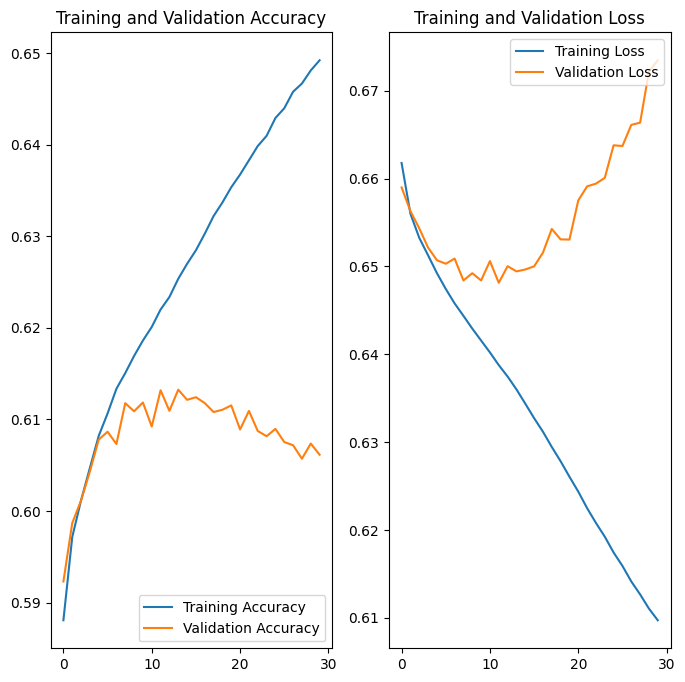

In [80]:
# Graph Training and Validation accuracy and loss

acc = nn_model_history.history['accuracy']
val_acc = nn_model_history.history['val_accuracy']

loss = nn_model_history.history['loss']
val_loss = nn_model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()